In [1]:
using MLJ
using CSV, DataFrames
using Plots

In [2]:
file = CSV.File(joinpath("data", "horse.csv"));
schema(file) # (triggers a file read)
horse = DataFrame(file)

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_extremities
,Int64,Int64,Float64,Int64,Int64,Int64
1,2,1,38.5,66,66,3
2,1,1,39.2,88,88,3
3,2,1,38.3,40,40,1
4,1,9,39.1,164,164,4
5,2,1,37.3,104,104,3
6,2,1,38.1,60,60,2
7,1,1,37.9,48,48,1
8,1,1,38.1,60,60,3
9,2,1,38.1,80,80,3


In [3]:
# fix the scientific types
coerce!(horse, autotype(horse));
coerce!(horse, Count => Continuous);
coerce!(horse,
        :surgery               => Multiclass,
        :age                   => Multiclass,
        :mucous_membranes      => Multiclass,
        :capillary_refill_time => Multiclass,
        :outcome               => Multiclass,
        :cp_data               => Multiclass);

schema(horse)

┌─────────────────────────┬─────────────────────────────────┬───────────────────
│ _.names                 │ _.types                         │ _.scitypes       ⋯
├─────────────────────────┼─────────────────────────────────┼───────────────────
│ surgery                 │ CategoricalValue{Int64, UInt32} │ Multiclass{2}    ⋯
│ age                     │ CategoricalValue{Int64, UInt32} │ Multiclass{2}    ⋯
│ rectal_temperature      │ Float64                         │ Continuous       ⋯
│ pulse                   │ Float64                         │ Continuous       ⋯
│ respiratory_rate        │ Float64                         │ Continuous       ⋯
│ temperature_extremities │ CategoricalValue{Int64, UInt32} │ OrderedFactor{4} ⋯
│ mucous_membranes        │ CategoricalValue{Int64, UInt32} │ Multiclass{6}    ⋯
│ capillary_refill_time   │ CategoricalValue{Int64, UInt32} │ Multiclass{3}    ⋯
│ pain                    │ CategoricalValue{Int64, UInt32} │ OrderedFactor{5} ⋯
│ peristalsis             │ 

In [4]:
y, X = unpack(horse, ==(:outcome), name -> true);

println(scitype(y))
schema(X)

AbstractVector{Multiclass{3}}


┌─────────────────────────┬─────────────────────────────────┬───────────────────
│ _.names                 │ _.types                         │ _.scitypes       ⋯
├─────────────────────────┼─────────────────────────────────┼───────────────────
│ surgery                 │ CategoricalValue{Int64, UInt32} │ Multiclass{2}    ⋯
│ age                     │ CategoricalValue{Int64, UInt32} │ Multiclass{2}    ⋯
│ rectal_temperature      │ Float64                         │ Continuous       ⋯
│ pulse                   │ Float64                         │ Continuous       ⋯
│ respiratory_rate        │ Float64                         │ Continuous       ⋯
│ temperature_extremities │ CategoricalValue{Int64, UInt32} │ OrderedFactor{4} ⋯
│ mucous_membranes        │ CategoricalValue{Int64, UInt32} │ Multiclass{6}    ⋯
│ capillary_refill_time   │ CategoricalValue{Int64, UInt32} │ Multiclass{3}    ⋯
│ pain                    │ CategoricalValue{Int64, UInt32} │ OrderedFactor{5} ⋯
│ peristalsis             │ 

# Naive tuning of a single parameter

The simplest way to tune a hyper-parameter is to use a learning curve

In [5]:
LogisticClassifier = @load LogisticClassifier pkg=MLJLinearModels
model = @pipeline ContinuousEncoder Standardizer LogisticClassifier
mach = machine(model, X, y)

import MLJLinearModels ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/john/.julia/packages/MLJModels/GKDnU/src/loading.jl:168


Machine{Pipeline277,…} trained 0 times; caches data
  args: 
    1:	Source @354 ⏎ `Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{6}}, AbstractVector{Multiclass{3}}, AbstractVector{Multiclass{2}}, AbstractVector{OrderedFactor{5}}, AbstractVector{OrderedFactor{4}}, AbstractVector{OrderedFactor{2}}}}`
    2:	Source @951 ⏎ `AbstractVector{Multiclass{3}}`


In [6]:
r = range(model, :(logistic_classifier.lambda), lower = 1e-2, upper=100, scale=:log10)

NumericRange(0.01 ≤ logistic_classifier.lambda ≤ 100.0; origin=50.005, unit=49.995) on log10 scale

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…}.
└ @ MLJBase /home/john/.julia/packages/MLJBase/QXObv/src/machines.jl:403
┌ Info: Attempting to evaluate 30 models.
└ @ MLJTuning /home/john/.julia/packages/MLJTuning/bjRHJ/src/tuned_models.jl:680
Evaluating over 30 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
Evaluating over 30 metamodels:   3%[>                        ]  ETA: 0:15:12┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
Evaluating over 30 metamodels:   7%[=>                       ]  ETA: 0:07:33┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
Evaluating over

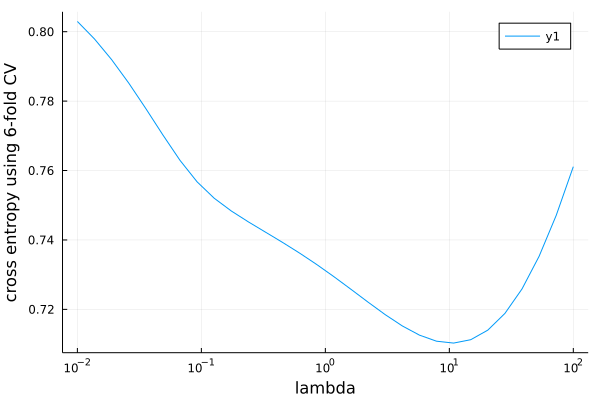

In [7]:
_, _, lambdas, losses = learning_curve(mach,
                                       range=r,
                                       resampling=CV(nfolds=6),
                                       resolution=30, # default
                                       measure=cross_entropy)
plt=plot(lambdas, losses, xscale=:log10)
xlabel!(plt, "lambda")
ylabel!(plt, "cross entropy using 6-fold CV")

So here we see that the ideal lambda is right around $\lambda=10$

In [8]:
best_lambda = lambdas[argmin(losses)]

10.826367338740546

# Self tuning models

We can *wrap* the model to make a new model that tunes specified hyper-parameters before training on all of the supplied data. 

Calling `predict()` on a tuned model calls predict on the hyper-parameter optimized *best* model. 

In [9]:
tuning = RandomSearch(rng=42)

RandomSearch(
    bounded = Distributions.Uniform,
    positive_unbounded = Distributions.Gamma,
    other = Distributions.Normal,
    rng = Random.MersenneTwister(42))

to specify which hyperparameters we want to fit, we use the `range()` method (note: this can be unbounded!)

In [10]:
r = range(model,
    :(logistic_classifier.lambda),
    lower=0,
    origin=6,
    unit=5,
    scale=:log10
)

NumericRange(0.0 ≤ logistic_classifier.lambda ≤ Inf; origin=6.0, unit=5.0) on log10 scale

In [11]:
# example for non-continuous parameters

s  = range(model, :(continuous_encoder.one_hot_ordered_factors),
           values = [true, false])

NominalRange(continuous_encoder.one_hot_ordered_factors = true, false)

now we can create the wrapper to get a tunedmodel with the two ranges

In [12]:
# do 15 different models and find best hyperparam combination
tuned_model = TunedModel(model=model,
    ranges=[r, s], 
    resampling=CV(nfolds=6),
    measures=cross_entropy,
    tuning=tuning,
    n=15
)

ProbabilisticTunedModel(
    model = Pipeline277(
            continuous_encoder = ContinuousEncoder,
            standardizer = Standardizer,
            logistic_classifier = LogisticClassifier),
    tuning = RandomSearch(
            bounded = Distributions.Uniform,
            positive_unbounded = Distributions.Gamma,
            other = Distributions.Normal,
            rng = Random.MersenneTwister(42)),
    resampling = CV(
            nfolds = 6,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = LogLoss(tol = 2.220446049250313e-16),
    weights = nothing,
    operation = nothing,
    range = MLJBase.ParamRange[NumericRange(0.0 ≤ logistic_classifier.lambda ≤ Inf; origin=6.0, unit=5.0) on log10 scale, NominalRange(continuous_encoder.one_hot_ordered_factors = true, false)],
    selection_heuristic = MLJTuning.NaiveSelection(nothing),
    train_best = true,
    repeats = 1,
    n = 15,
    acceleration = CPU1{Nothing}(nothing),
    acceleration_resa

In [13]:
tuned_mach = machine(tuned_model, X, y);
fit!(tuned_mach);

┌ Info: Training Machine{ProbabilisticTunedModel{RandomSearch,…},…}.
└ @ MLJBase /home/john/.julia/packages/MLJBase/QXObv/src/machines.jl:403
┌ Info: Attempting to evaluate 15 models.
└ @ MLJTuning /home/john/.julia/packages/MLJTuning/bjRHJ/src/tuned_models.jl:680
Evaluating over 15 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
Evaluating over 15 metamodels:   7%[=>                       ]  ETA: 0:00:14┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
Evaluating over 15 metamodels:  13%[===>                     ]  ETA: 0:00:07┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
Evaluat

In [14]:
predict(tuned_mach, rows=1:3)

3-element MLJBase.UnivariateFiniteVector{Multiclass{3}, Int64, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(1=>0.541, 2=>0.289, 3=>0.169)
 UnivariateFinite{Multiclass{3}}(1=>0.688, 2=>0.0232, 3=>0.289)
 UnivariateFinite{Multiclass{3}}(1=>0.958, 2=>0.0251, 3=>0.0169)

Let's look at the best model

In [15]:
rep = report(tuned_mach);
rep.best_model

Pipeline277(
    continuous_encoder = ContinuousEncoder(
            drop_last = false,
            one_hot_ordered_factors = false),
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    logistic_classifier = LogisticClassifier(
            lambda = 9.509561592743273,
            gamma = 0.0,
            penalty = :l2,
            fit_intercept = true,
            penalize_intercept = false,
            solver = nothing))

For the special case two parameters we can plot the result via a plotting recipe on the `TunedMachine`

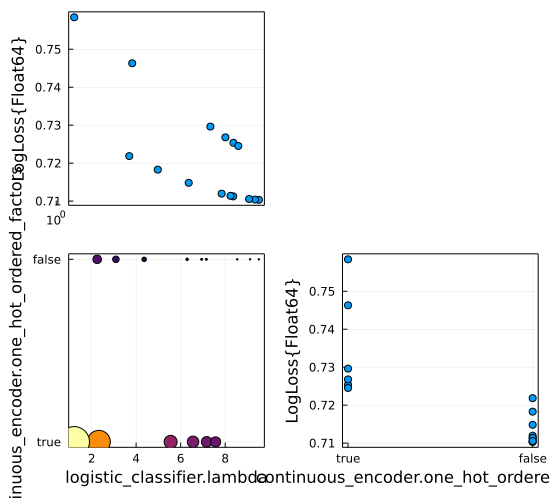

┌ Warning: No strict ticks found
└ @ PlotUtils /home/john/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294
┌ Warning: No strict ticks found
└ @ PlotUtils /home/john/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


In [16]:
plt = plot(tuned_mach)

Finally, we can compare cross-validation estimate of the performance with the original model

In [18]:
err = evaluate!(mach, resampling=CV(nfolds=3), measure=cross_entropy)

┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
Evaluating over 3 folds: 100%[=========================] Time: 0:00:00


PerformanceEvaluation object with these fields:
  measure, measurement, operation, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_pairs
Extract:
┌────────────────────────────┬─────────────┬───────────┬─────────────────────┐
│ measure                    │ measurement │ operation │ per_fold            │
├────────────────────────────┼─────────────┼───────────┼─────────────────────┤
│ LogLoss(tol = 2.22045e-16) │ 0.737       │ predict   │ [NaN, 0.718, 0.756] │
└────────────────────────────┴─────────────┴───────────┴─────────────────────┘


In [19]:
tuned_err = evaluate!(tuned_mach, resampling=CV(nfolds=3), measure=cross_entropy)

┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers

┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers.jl:500
┌ Warning: Extremely small standard deviation encountered in standardization.
└ @ MLJModels /home/john/.julia/packages/MLJModels/GKDnU/src/builtins/Transformers

PerformanceEvaluation object with these fields:
  measure, measurement, operation, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_pairs
Extract:
┌────────────────────────────┬─────────────┬───────────┬─────────────────────┐
│ measure                    │ measurement │ operation │ per_fold            │
├────────────────────────────┼─────────────┼───────────┼─────────────────────┤
│ LogLoss(tol = 2.22045e-16) │ 0.741       │ predict   │ [NaN, 0.756, 0.727] │
└────────────────────────────┴─────────────┴───────────┴─────────────────────┘
